In [2]:
import numpy as np 
import pandas as pd
import itertools

In [3]:
pairs = pd.read_csv('../data/pairs.csv')
atoms = pd.read_csv('../data/atoms.csv')
stacked = pd.read_csv('../data/stacked.csv')

In [4]:
def planar_angle(p1, p2, p3):
    b1 = p2 - p1
    b2 = p2 - p3

    angle = np.arccos(np.dot(b1, b2) / (np.linalg.norm(b1) * np.linalg.norm(b2)))
    return np.degrees(angle)


def torsion_angle(p1, p2, p3, p4):
    b1 = p2 - p1
    b2 = p3 - p2
    b3 = p4 - p3

    n1 = np.cross(b1, b2)
    n2 = np.cross(b2, b3)

    torsion = np.arctan2(
        np.dot(np.cross(n1, n2), b2 * np.linalg.norm(b2)), np.dot(n1, n2)
    )
    return np.degrees(torsion)

In [5]:
atoms

,file,nt,atom,x,y,z
0,2qk9,B.A1,O5',20.620,48.671,-1.704
1,2qk9,B.A1,C5',20.088,47.812,-2.721
2,2qk9,B.A1,C4',20.346,46.371,-2.343
3,2qk9,B.A1,O4',21.767,46.112,-2.385
4,2qk9,B.A1,C3',19.922,46.021,-0.925
...,...,...,...,...,...,...
10588572,6i1l,E.U20,C6,-37.037,9.261,3.295
10588573,6i1l,E.C21,P,-39.401,9.796,-2.070
10588574,6i1l,E.C21,OP1,-38.582,10.408,-3.138
10588575,6i1l,E.C21,OP2,-39.833,10.637,-0.934


In [6]:
pairs

,file,nt1,nt2,lw,saenger,canonical
0,6du4,B.G1,B.C29,cWW,19-XIX,True
1,6du4,B.G2,B.C28,cWW,19-XIX,True
2,6du4,B.U3,B.A27,cWW,20-XX,True
3,6du4,B.U4,B.A26,cWW,20-XX,True
4,6du4,B.G5,B.C25,cWW,19-XIX,True
...,...,...,...,...,...,...
239214,4v7l,DB.G83,DB.C94,cWW,19-XIX,True
239215,4v7l,DB.C84,DB.G93,cWW,19-XIX,True
239216,4v7l,DB.G85,DB.C92,cWW,19-XIX,True
239217,4v7l,DB.G86,DB.C91,cWW,19-XIX,True


In [7]:
pairs.file.unique()

array(['6du4', '2g92', '3nvi', '6b3k', '2zh8', '7bah', '4feo', '2eev',
       '6zlc', '5nwq', '4e48', '2et5', '7f8z', '3pdr', '3gs8', '6prv',
       '2oj3', '5ud5', '4wc2', '5d8h', '5tko', '6dcb', '4x4n', '4jyz',
       '5vj9', '2ct8', '7mjw', '7a9n', '3gm7', '3qrp', '6xh2', '5fkd',
       '4fen', '2ho7', '1i9x', '3jxq', '7d7v', '6u7z', '3cd6', '2pn3',
       '1d4r', '7ki3', '5u3g', '5lr3', '6i1l', '7k98', '4j50', '3e5c',
       '3ski', '1dqf', '3kfu', '3oxb', '6vem', '4pr6', '3hax', '1zfx',
       '3mqk', '1q93', '4lx5', '2ec0', '4erd', '2val', '3iab', '3q3z',
       '5y6z', '6yym', '2eeu', '4enc', '6dcc', '3og8', '3fo6', '4oo8',
       '2vqf', '2nz4', '6ltr', '3v7e', '4c8y', '5hnj', '280d', '2d2k',
       '2uua', '6o97', '5ib7', '3cgq', '2tra', '2zzm', '5c45', '6bjg',
       '1y26', '7eoh', '4k31', '6jq5', '3bnr', '5xtm', '4c4w', '6m0x',
       '1jid', '7eck', '2drb', '2uwm', '2i91', '4x4t', '1zx7', '7tda',
       '5d0b', '5ew4', '6fq3', '6dme', '5yyn', '6jq6', '3olb', '4lx6',
      

In [8]:
class atomStructure():
    def __init__(self, x, y, z, atom) -> None:
        self.x = x
        self.y = y
        self.z = z
        self.atom = atom

In [9]:
df = atoms[atoms["file"] == "6du4"].query('nt == "B.C29"')

In [10]:
def pairwise_distances(df, num_bins = 20):
    coords = df[['x', 'y', 'z']].values
    distances = np.sqrt(np.sum((coords[:, np.newaxis, :] - coords[np.newaxis, :, :]) ** 2, axis=-1))
    upper_triangle_indices = np.triu_indices_from(distances, k=1)
    flattened_distances = distances[upper_triangle_indices]
    histogram, bin_edges = np.histogram(flattened_distances, bins=num_bins, density=True)
    normalized_histogram = histogram / np.sum(histogram)
    return normalized_histogram, bin_edges

In [11]:
nt = atoms[atoms["file"] == "6du4"].query('nt == "B.C29"')

In [12]:
normalized_histogram, bin_edges = pairwise_distances(nt)

In [13]:
normalized_histogram

array([0.11052632, 0.        , 0.08421053, 0.10526316, 0.02631579,
       0.05263158, 0.08421053, 0.05789474, 0.07894737, 0.05263158,
       0.05263158, 0.06842105, 0.05789474, 0.03684211, 0.04736842,
       0.02631579, 0.02105263, 0.02105263, 0.00526316, 0.01052632])

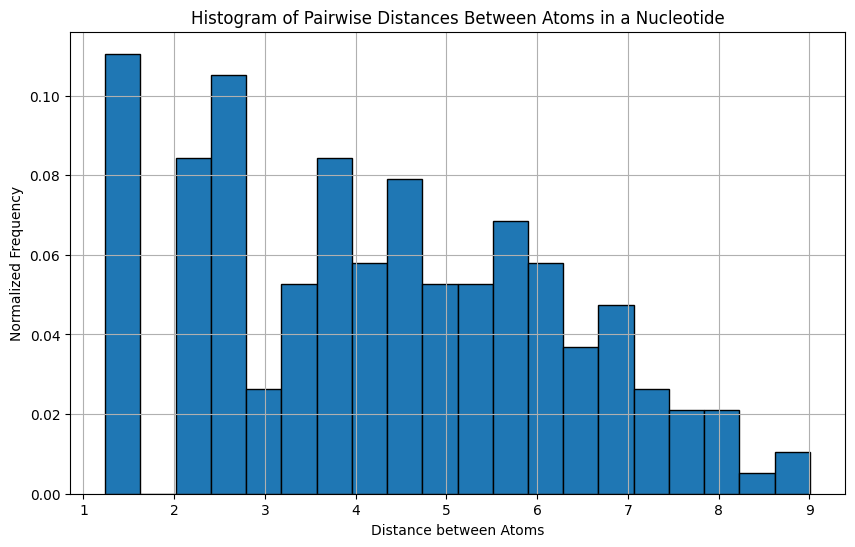

In [14]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], normalized_histogram, width=np.diff(bin_edges), edgecolor='black', align='edge')

# Adding labels and title
plt.xlabel('Distance between Atoms')
plt.ylabel('Normalized Frequency')
plt.title('Histogram of Pairwise Distances Between Atoms in a Nucleotide')
plt.grid(True)

# Show the plot
plt.show()

In [15]:
lw_pairs = pairs[['file','nt1', 'nt2', 'lw']]
lw_pairs

,file,nt1,nt2,lw
0,6du4,B.G1,B.C29,cWW
1,6du4,B.G2,B.C28,cWW
2,6du4,B.U3,B.A27,cWW
3,6du4,B.U4,B.A26,cWW
4,6du4,B.G5,B.C25,cWW
...,...,...,...,...
239214,4v7l,DB.G83,DB.C94,cWW
239215,4v7l,DB.C84,DB.G93,cWW
239216,4v7l,DB.G85,DB.C92,cWW
239217,4v7l,DB.G86,DB.C91,cWW


In [16]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
lw_pairs['class'] = label_encoder.fit_transform(lw_pairs['lw']) 

C:\Users\Jurek\AppData\Local\Temp\ipykernel_30564\1109799457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_pairs['class'] = label_encoder.fit_transform(lw_pairs['lw'])


In [17]:
lw_pairs

,file,nt1,nt2,lw,class
0,6du4,B.G1,B.C29,cWW,15
1,6du4,B.G2,B.C28,cWW,15
2,6du4,B.U3,B.A27,cWW,15
3,6du4,B.U4,B.A26,cWW,15
4,6du4,B.G5,B.C25,cWW,15
...,...,...,...,...,...
239214,4v7l,DB.G83,DB.C94,cWW,15
239215,4v7l,DB.C84,DB.G93,cWW,15
239216,4v7l,DB.G85,DB.C92,cWW,15
239217,4v7l,DB.G86,DB.C91,cWW,15


In [18]:
len(pairs)

239219

In [19]:
from tqdm import tqdm
import time

In [20]:
pairs_data = {}

In [21]:
for f in pairs.file.unique():
    pairs_data[f] = {}

In [22]:
# from tqdm.auto import tqdm
# tqdm.pandas()
# matrix_nested_dict = atoms.groupby(['file', 'nt']).progress_apply(
#     lambda group: group[['x', 'y', 'z']].values.tolist()
# ).to_dict()

In [23]:
# from tqdm.auto import tqdm
# tqdm.pandas()
# matrix_nested_dict_names = atoms.groupby(['file', 'nt']).progress_apply(
#     lambda group: group.apply(lambda row: [row['atom'], row['x'], row['y'], row['z']], axis=1).tolist()
# ).to_dict()

c:\Users\Jurek\anaconda3\envs\magisterka\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 486049/486049 [05:21<00:00, 1510.99it/s]


In [32]:
# import pickle 
# object = matrix_nested_dict_names
# filehandler = open('matrix_nested_dict_names', 'wb') 
# pickle.dump(object, filehandler)

In [35]:
import pickle 
filehandler = open('matrix_nested_dict_names', 'rb') 
matrix_nested_dict_names = pickle.load(filehandler)

In [37]:
np.array(matrix_nested_dict_names[('1a9n', 'Q.A11')])[:,1:].astype(float)

array([[38.82 ,  9.117, -3.701],
       [38.33 ,  9.457, -5.063],
       [40.252,  9.257, -3.441],
       [38.02 , 10.048, -2.676],
       [36.593, 10.119, -2.809],
       [35.935, 10.264, -1.462],
       [36.229,  9.099, -0.647],
       [36.421, 11.413, -0.605],
       [35.738, 12.616, -0.927],
       [35.967, 10.965,  0.787],
       [34.568, 11.208,  0.929],
       [36.25 ,  9.493,  0.735],
       [37.549,  8.961,  1.22 ],
       [38.638,  8.66 ,  0.413],
       [39.645,  8.202,  1.06 ],
       [39.222,  8.179,  2.389],
       [39.853,  7.781,  3.58 ],
       [41.109,  7.312,  3.639],
       [39.164,  7.889,  4.73 ],
       [37.92 ,  8.368,  4.636],
       [37.24 ,  8.764,  3.593],
       [37.943,  8.647,  2.476]])

In [25]:
def gen_triplets_and_angle(vector1, vector2, num_bins=150):
    pairs_from_vector1 = list(itertools.combinations(vector1, 2))
    pairs_from_vector2 = list(itertools.combinations(vector2, 2))

    # Generate triplets where two elements are from vector1 and one from vector2
    triplets_1 = []
    for single_element in vector2:
        for pair in pairs_from_vector1:
            triplets_1.append((*pair, single_element))

    # Generate triplets where two elements are from vector2 and one from vector1
    triplets_2 = []
    for single_element in vector1:
        for pair in pairs_from_vector2:
            triplets_2.append((*pair, single_element))

    # Combine all triplets
    all_triplets = triplets_1 + triplets_2

    angles = []

    all_triplets = np.array(all_triplets)

    for trip in all_triplets:
        angles.append(planar_angle(trip[0], trip[1], trip[2]))
    
    histogram, bin_edges = np.histogram(angles, bins=num_bins, density=True)
    normalized_histogram = histogram / np.sum(histogram)
    return normalized_histogram, bin_edges, angles

In [46]:
matrix_nested_dict_names

{('1a9n', 'Q.A11'): [['P', 38.82, 9.117, -3.701],
  ['OP1', 38.33, 9.457, -5.063],
  ['OP2', 40.252, 9.257, -3.441],
  ["O5'", 38.02, 10.048, -2.676],
  ["C5'", 36.593, 10.119, -2.809],
  ["C4'", 35.935, 10.264, -1.462],
  ["O4'", 36.229, 9.099, -0.647],
  ["C3'", 36.421, 11.413, -0.605],
  ["O3'", 35.738, 12.616, -0.927],
  ["C2'", 35.967, 10.965, 0.787],
  ["O2'", 34.568, 11.208, 0.929],
  ["C1'", 36.25, 9.493, 0.735],
  ['N9', 37.549, 8.961, 1.22],
  ['C8', 38.638, 8.66, 0.413],
  ['N7', 39.645, 8.202, 1.06],
  ['C5', 39.222, 8.179, 2.389],
  ['C6', 39.853, 7.781, 3.58],
  ['N6', 41.109, 7.312, 3.639],
  ['N1', 39.164, 7.889, 4.73],
  ['C2', 37.92, 8.368, 4.636],
  ['N3', 37.24, 8.764, 3.593],
  ['C4', 37.943, 8.647, 2.476]],
 ('1a9n', 'Q.A14'): [['P', 29.507, 20.492, 1.553],
  ['OP1', 28.558, 20.483, 0.446],
  ['OP2', 30.774, 21.19, 1.306],
  ["O5'", 28.788, 21.066, 2.887],
  ["C5'", 27.432, 21.402, 2.592],
  ["C4'", 26.632, 21.57, 3.862],
  ["O4'", 26.228, 22.952, 3.969],
  ["C3'"

In [54]:
def gen_quad_and_angle(pos1, pos2, vector1, vector2, num_bins= 150):

    # Generate all possible pairs from each vector
    # pairs_from_vector1 = list(itertools.combinations(vector1, 2))
    # pairs_from_vector2 = list(itertools.combinations(vector2, 2))

    pairs_from_vector1 = [(vector1[pos1], atom) for atom in vector1 if list(atom) != list(vector1[pos1])]
    
    # Generate all pairs for pos2 with all other atoms in vector2 (excluding pos2)
    pairs_from_vector2 = [(vector2[pos2], atom) for atom in vector1 if list(atom) != list(vector2[pos2])]

    # zostawić C4' z pierwszego nukleotydu i wygenerować wszystkie pary z innymi 
    # tak samo zrobić dla drugiego nukleotydu 

    # Generate combinations of pairs

    combinations_of_pairs = []
    for pair1 in pairs_from_vector1:
        for pair2 in pairs_from_vector2:
            combinations_of_pairs.append(pair1 + pair2)

    
    combinations_of_pairs = np.array(combinations_of_pairs)

    # Print the combinations of pairs
    angles = [torsion_angle(quad[0], quad[1], quad[2], quad[3]) for quad in combinations_of_pairs]

    histogram, bin_edges = np.histogram(angles, bins=num_bins, density=True)
    normalized_histogram = histogram / np.sum(histogram)
    return normalized_histogram, bin_edges

In [59]:
lw_data = []

for i, (file, nt1, nt2, lw, sae, can) in pairs.iterrows():
    if i % 100 == 0:
        print(i, "/", len(pairs)-1, end='\r')


    df1 = matrix_nested_dict_names[(file, nt1)]
    df2 = matrix_nested_dict_names[(file, nt2)]

    df1 = np.array(df1)
    df2 = np.array(df2)

    names_1 = df1[:, 0]
    pos_1 = np.where(names_1 == "C4'")[0][0]
    names_2 = df2[:, 0]
    pos_2 = np.where(names_2 == "C4'")[0][0]

    df1 = np.array(df1[:,1:].astype(float))
    df2 = np.array(df2[:,1:].astype(float))


    # try:
    #     planar_angles, _, ang = gen_triplets_and_angle(pos_1, pos_2, df1, df2, 50)
    # except:
    #     continue
    torsion_angles, _ = gen_quad_and_angle(pos_1, pos_2, df1, df2, 50)
    # try:
        
    # except:
    #     continue


    #torsion_angles, _ = gen_quad_and_angle(df1, df2, 50)

    merged = np.concatenate((df1, df2))
    pairwise, _ = pairwise_distances(pd.DataFrame(merged, columns=['x','y','z']), num_bins=50)
    
    row = [*list(pairwise),*list(torsion_angles), lw, sae, can] #*list(torsion_angles),
    lw_data.append(row)


In [28]:
# import pickle


# fileObj = open('planar_angles.obj', 'wb')
# pickle.dump(lw_data,fileObj)
# fileObj.close()

In [60]:
data_to_save = pd.DataFrame(lw_data)

In [61]:
data_to_save.to_csv('torsion_angles.csv',";", header=None, index=None)